# Function Testing Notebook

This notebook is meant to test external-facing functions to ensure they are working as expected.

In [23]:
import sys
from pathlib import Path
import time
import tempfile

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import json

packageroot = Path('../../').resolve()
print(packageroot)
sys.path.append(str(packageroot))


/Users/ohy2/Documents/GitHubRepo/PyEEG


In [33]:
from pythoneeg import core
from pythoneeg import visualization

from pythoneeg.visualization import WindowAnalysisResult, AnimalOrganizer
# from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'LongRecordingAnalyzer', 'MountainSortOrganizer']


In [3]:
tempfile.tempdir = '/scr1/users/dongjp'

In [7]:
tmpmet = core.DDFBinaryMetadata(r"/Volumes/marsh_single_unit/PythonEEG Data Bins/A5 WT 12_12-2023/Cage 1 A5 -1_Meta.csv")
print(tmpmet.dt_end.ctime())
display(tmpmet.channel_names)

Tue Dec 12 12:57:00 2023


['Intan Input (1)/PortB L Aud Ctx',
 'Intan Input (1)/PortB L Vis Ctx',
 'Intan Input (1)/PortB L Hipp',
 'Intan Input (1)/PortB L Barrel',
 'Intan Input (1)/PortB L Motor',
 'Intan Input (1)/PortB R Motor',
 'Intan Input (1)/PortB R Barrel',
 'Intan Input (1)/PortB R Hipp',
 'Intan Input (1)/PortB R Vis Ctx',
 'Intan Input (1)/PortB R Aud Ctx']

In [10]:
# Had to manually copy A5 WT 12_12-2023 folder from marsh_single_unit

data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A5 WT 12_12-2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:168: UserWarning: truncate = True. Only the first 3 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:254: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")


Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -1_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/eda38debde95f1344278ea84f4c176ba36776830f13d7b3f
Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -3_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/63be2113c7221b049bb65c011bc2793d723116c3570d5016
Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -4_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/e22e2e07b04d5f08a2ba6578cc504ec3eb5183da74d83832


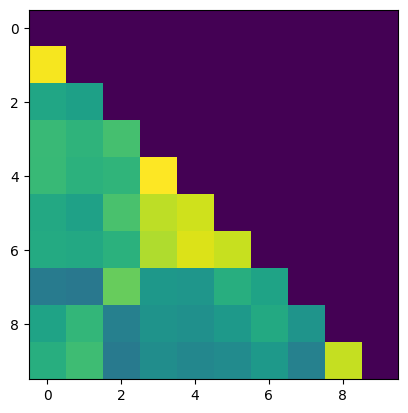

In [11]:
lan = core.LongRecordingAnalyzer(lrec, 10)

lan.setup_njobs()
mags = []
phases = []

for i in range(lan.n_fragments // 100):
    if i == 20:
        break
    t = time.process_time()

    # lan.compute_nspike(i)
    # csd = lan.compute_csd(i)
    # plt.imshow(csd['alpha'])

    coh = lan.compute_cohere(i)
    plt.imshow(coh['gamma'])

    pcorr = lan.compute_pcorr(i)
    plt.imshow(pcorr)

    # cacoh = lan.compute_cacoh(i)
    # plt.imshow(cacoh[0])

    # cacoh = lan.compute_cacoh(i, freq_res=1, indices=([[0,1,2,3]], [[4,5,6,7]]))
    # mags.append(cacoh[0])
    # phases.append(cacoh[1])


    # fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    # ax[0].imshow(corr)
    # ax[1].imshow(pcorr)
    # plt.show()

    
# _, ax = plt.subplots(1, 2, figsize=(8, 2), sharex=True)
# mags = np.stack(mags, axis=-1).mean(axis=-1)
# phases = np.stack(phases, axis=-1).mean(axis=-1)
# ax[0].semilogx(cacoh[2], mags.transpose())
# ax[1].semilogx(cacoh[2], phases.transpose(), c='C1')
# ax[0].set_title("Magnitude")
# ax[1].set_title("Phase")
# plt.show()


In [16]:
base_folder

PosixPath('/Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data')

In [20]:
# %%script true
base_folder = Path('./test-data').resolve()
ao = visualization.AnimalOrganizer(base_folder, "A5", mode="concat", truncate=5)
ao.convert_colbins_to_rowbins(overwrite=False)
ao.convert_rowbins_to_rec()

war = ao.compute_windowed_analysis(['all'], exclude=['nspike', 'wavetemp'], multiprocess_mode='dask')

outPath = Path('./test-wars').resolve()
outPath.mkdir(parents=True, exist_ok=True)

war.to_pickle_and_json(Path('./test-wars').resolve())
# result = ao.compute_windowed_analysis(['cohere', 'pcorr']) # nspike needs work
# result = ao.compute_windowed_analysis(['nspike', 'wavetemp']) # nspike needs work
# result = ao.compute_windowed_analysis(['psd', 'cohere'], welch_bin_t=2, magnitude=False)

/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:168: UserWarning: truncate = True. Only the first 5 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:254: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")


Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -1_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/bc1117dd06da11b012fcd3e7c19291347bc57d6b71dc4067
Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -3_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/a574507024352724bc49c66b64c39787efad74c61a8558db
Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -4_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/ed4e23bb0565b27498fa6efd6fc296fe6e395941f0884cb9
Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-data/A5 WT 12_12-2023/Cage 1 A5 -5_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/ab36446c8d1ab0e61eac437c7fbe378e17c8e884ecf270d9
Reading /Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/t

Processing rows: 100%|██████████| 1917/1917 [01:25<00:00, 22.39it/s]


In [ ]:
war.get_result(['all'], allow_missing=True)

In [ ]:
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
ap.plot_linear_temporal(['isday'], afigsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center')
ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

In [27]:
animids = ['A10 KO']
wars = []

for animid in animids:
    ao = AnimalOrganizer(r"/Volumes/marsh_single_unit/PythonEEG Data Bins", animid, mode="concat")
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec()
    war = ao.compute_windowed_analysis(['all'], exclude=['nspike', 'wavetemp'])
    war.to_pickle_and_json(r'/Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-wars')
    wars.append(war)
    try:
        ao.cleanup_rec()
    except Exception as e:
        print(f"ERROR: {e}")

/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:254: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:254: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/core/core.py:254: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")


Reading /Volumes/marsh_single_unit/PythonEEG Data Bins/A10 KO 12_15_2023/Cage 2 A10-4_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/46151e2b06ae068c63e68eb4728bd38c86994883f8ee5ff9
Reading /Volumes/marsh_single_unit/PythonEEG Data Bins/A10 KO 12_15_2023/Cage 2 A10-5_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/afd5f95a91db58c03f24439c48d553f84ad3d484bc407ea8
Reading /Volumes/marsh_single_unit/PythonEEG Data Bins/A10 KO 12_15_2023/Cage 2 A10-6_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/683acf8cdb5067aeeed9dc455bcf32ec3be11765e185e3da
Reading /Volumes/marsh_single_unit/PythonEEG Data Bins/A10 KO 12_15_2023/Cage 2 A10-7_RowMajor.npy.gz
Opening tempfile /var/folders/gz/c4v7tdb972v1l3clm5lpwwyszxhlcz/T/d9c9d870f9b005f367cc8cb4931ab6e347368200fcc133ce
Reading /Volumes/marsh_single_unit/PythonEEG Data Bins/A10 KO 12_14_2023/Cage 2 A10-1_RowMajor.npy.gz
Opening tempfile /var/folders/

Processing rows: 100%|██████████| 31/31 [00:01<00:00, 19.67it/s]
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/visualization/results.py:263: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.features_df = pd.concat(dataframes)


ERROR: 'str' object has no attribute '_accessor'


In [29]:
# Load Window Analysis Results from files
# warnames = ['WT-A5', 'KO-F22', 'KO-A10', 'WT-G25', 'WT-N21', 'WT-G26']
warnames = ['KO-A10', 'WT-A5']
# warnames = ['WT-G26', 'WT-N21']
# warnames = ['WT-N23', 'WT-N25']
reconstruct_war:list[WindowAnalysisResult] = []
# del war
for i,warname in enumerate(warnames):
    # with open(rf"Z:\PythonEEG\analysis\{warname}.json", 'r') as f:
    with open(rf"/Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-wars/{warname}.json", 'r') as f:
        ch_names = json.load(f)
        war = WindowAnalysisResult(pd.read_pickle(rf"/Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-wars/{warname}.pkl"), channel_names=ch_names)
        # war = WindowAnalysisResult(pd.read_pickle(rf"/Users/ohy2/Documents/GitHubRepo/PyEEG/notebooks/tests/test-wars/{warname}.pkl"), genotype='WT', channel_names=ch_names)

    
    # war.filter_bad_channel_fragments() # Filtering can be done after the fact
    reconstruct_war.append(war)

In [35]:
test = reconstruct_war[0]

print(test.get_info())

AttributeError: 'WindowAnalysisResult' object has no attribute 'get_info'